In [1]:
!pip install -q scikit-fuzzy

DEPRECATION: Loading egg at c:\users\cogito ergo sum\appdata\local\programs\python\python312\lib\site-packages\homework-0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Satisfacción estimada del cliente: 72.09/100


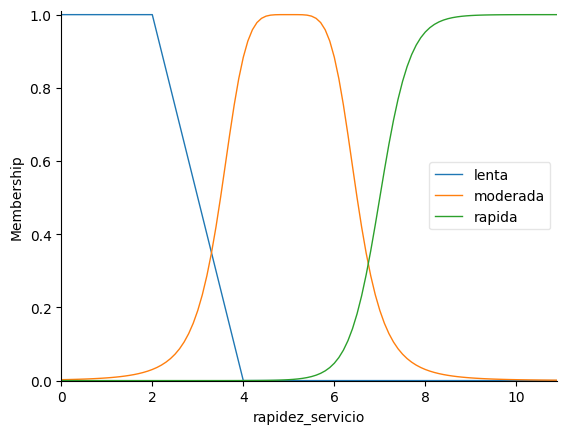

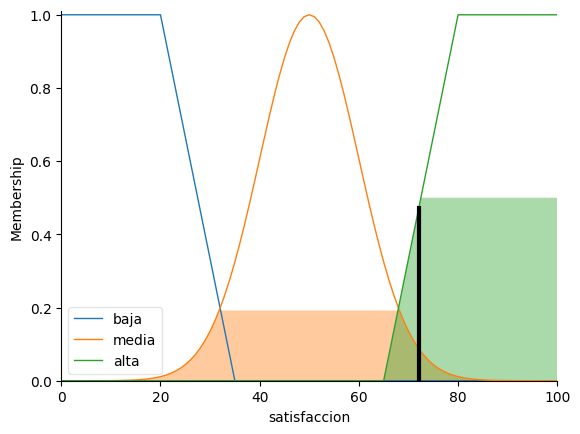

In [10]:
# --- SISTEMA DIFUSO DE SATISFACCIÓN EN UNA CAFETERÍA ---


# Importar librerías
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -------------------------------------
# 1. Definición del Universo y Variables
# -------------------------------------

calidad_cafe = ctrl.Antecedent(np.arange(0, 11, 0.1), 'calidad_cafe')
atencion_barista = ctrl.Antecedent(np.arange(0, 11, 0.1), 'atencion_barista')
rapidez_servicio = ctrl.Antecedent(np.arange(0, 11, 0.1), 'rapidez_servicio')
satisfaccion = ctrl.Consequent(np.arange(0, 101, 1), 'satisfaccion')



# -------------------------------------
# 2. Funciones de Pertenencia (https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html)
# -------------------------------------

#Calidad del café
calidad_cafe['mala'] = fuzz.gaussmf(calidad_cafe.universe, 0,1.5)
calidad_cafe['aceptable'] = fuzz.gbellmf(calidad_cafe.universe, 1.5, 3, 5)
calidad_cafe['excelente'] = fuzz.sigmf(calidad_cafe.universe, 8, 2)

#Atención al barista
atencion_barista['deficiente'] = fuzz.zmf(atencion_barista.universe, 2,4)
atencion_barista['normal'] = fuzz.gaussmf(atencion_barista.universe, 5, 1.2)
atencion_barista['excelente'] = fuzz.smf(atencion_barista.universe, 6, 8)

# Rapidez del servicio
rapidez_servicio['lenta'] = fuzz.trapmf(rapidez_servicio.universe, [0, 0, 2, 4])  # Trapezoidal
rapidez_servicio['moderada'] = fuzz.gbellmf(rapidez_servicio.universe, 1.5, 2.5, 5)  # Campana generalizada
rapidez_servicio['rapida'] = fuzz.sigmf(rapidez_servicio.universe, 7, 3)

#Satisfacción del cliente
satisfaccion['baja'] = fuzz.trapmf(satisfaccion.universe, [0, 0, 20, 35])
satisfaccion['media'] = fuzz.gaussmf(satisfaccion.universe, 50, 10)
satisfaccion['alta'] = fuzz.trapmf(satisfaccion.universe, [65, 80, 100, 100])

# Definir un modificador
def concentracion(conjunto_calidad):
    return conjunto_calidad ** 2

# Aplicar modificadores a las funciones de pertenencia seleccionadas
calidad_cafe_muy_excelente = concentracion(calidad_cafe['excelente'].mf)  # Concentración: "muy excelente"

def masomenos(conjunto_barista):
    return conjunto_barista ** (1/2)

atencion_barista_mas_o_menos_normal = masomenos(atencion_barista['normal'].mf)

# Ejemplo utilizando el modificador

calidad_cafe['muy_excelente'] = calidad_cafe_muy_excelente
atencion_barista['mas_o_menos_normal'] = atencion_barista_mas_o_menos_normal

# -------------------------------------
# 3. Visualización de las funciones de pertenencia
# -------------------------------------

rapidez_servicio.view()

# -------------------------------------
# 4. Definición de Reglas Difusas
# -------------------------------------

regla1 = ctrl.Rule(calidad_cafe['excelente'] & atencion_barista['excelente'], satisfaccion['alta'])

regla2 = ctrl.Rule(calidad_cafe['aceptable'] & atencion_barista['excelente'], satisfaccion['alta'])

regla3 = ctrl.Rule(calidad_cafe['aceptable'] & atencion_barista['normal'], satisfaccion['media'])

regla4 = ctrl.Rule(calidad_cafe['mala'] | atencion_barista['deficiente'], satisfaccion['baja'])

regla5 = ctrl.Rule(rapidez_servicio['lenta'], satisfaccion['baja'])

regla6 = ctrl.Rule(rapidez_servicio['moderada'], satisfaccion['media'])

regla7 = ctrl.Rule(rapidez_servicio['rapida'], satisfaccion['alta'])


# -------------------------------------
# 5. Crear el sistema y simulador
# -------------------------------------
sistema = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7])
simulador = ctrl.ControlSystemSimulation(sistema)

# -------------------------------------
# 6. Ingreso de valores de entrada
# (puedes modificarlos para probar distintos casos)
# -------------------------------------

simulador.input['calidad_cafe'] = 8.5
simulador.input['atencion_barista'] = 5
simulador.input['rapidez_servicio'] = 7


# -------------------------------------
# 7. Ejecutar el sistema
# -------------------------------------
simulador.compute()

# Mostrar resultado
print(f"Satisfacción estimada del cliente: {simulador.output['satisfaccion']:.2f}/100")

# Visualización del resultado de salida
satisfaccion.view(sim=simulador)

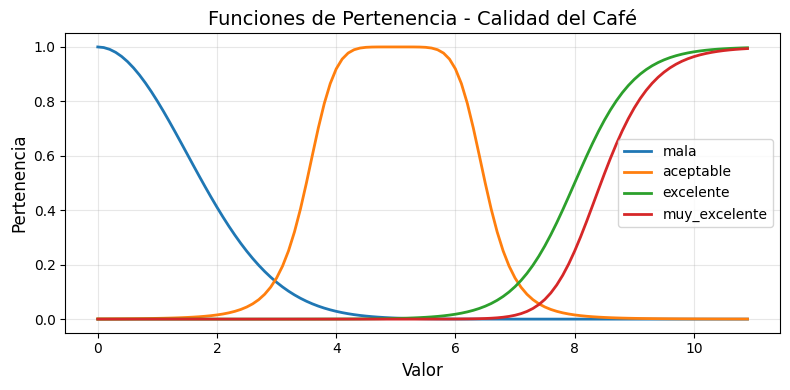

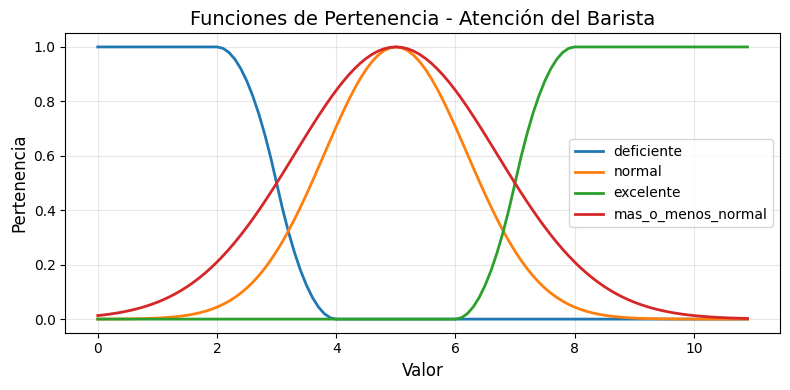

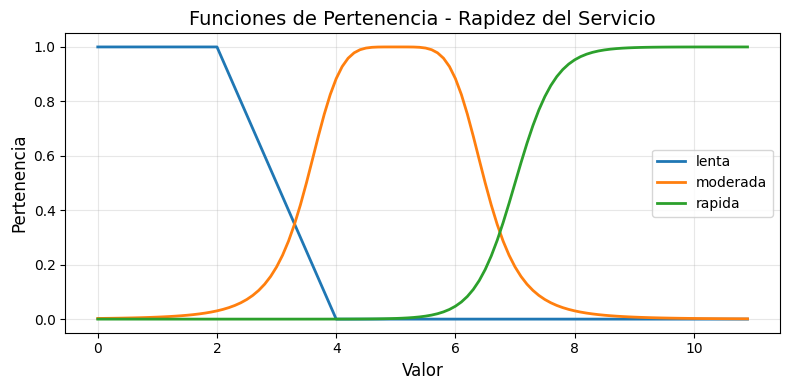

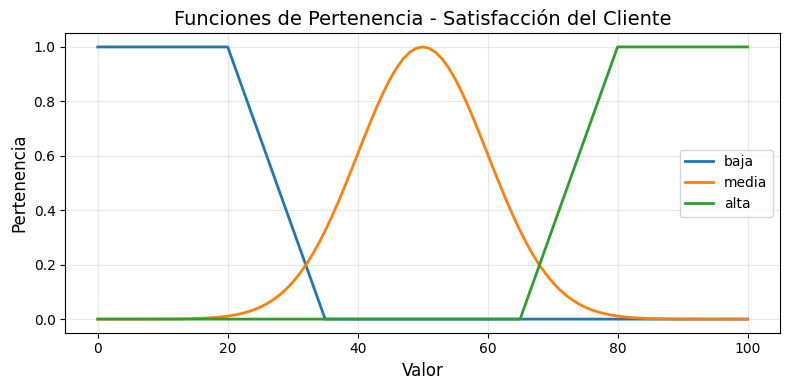

In [11]:
# Gráficos personalizados para funciones de pertenencia
def plot_membership(var, title):
    plt.figure(figsize=(8, 4))
    for label in var.terms:
        plt.plot(var.universe, var[label].mf, label=label, linewidth=2)

    plt.title(f'Funciones de Pertenencia - {title}', fontsize=14)
    plt.xlabel('Valor', fontsize=12)
    plt.ylabel('Pertenencia', fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualizar cada variable con estilo mejorado
plot_membership(calidad_cafe, 'Calidad del Café')
plot_membership(atencion_barista, 'Atención del Barista')
plot_membership(rapidez_servicio, 'Rapidez del Servicio')
plot_membership(satisfaccion, 'Satisfacción del Cliente')

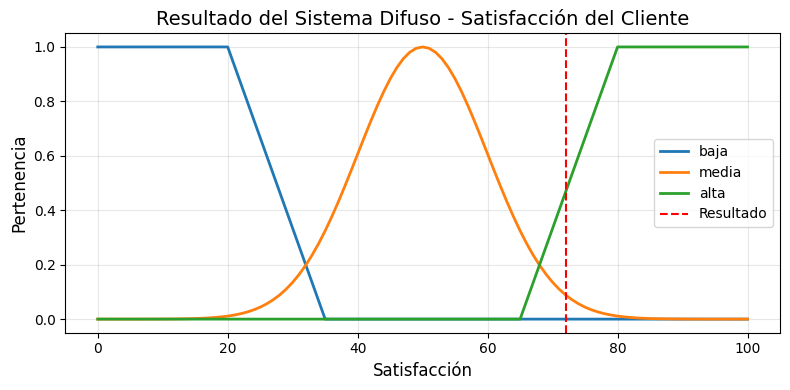

In [9]:
# Visualización personalizada de la salida calculada
plt.figure(figsize=(8, 4))
for label in satisfaccion.terms:
    plt.plot(satisfaccion.universe, satisfaccion[label].mf, label=label, linewidth=2)

plt.axvline(simulador.output['satisfaccion'], color='red', linestyle='--', label='Resultado')
plt.title('Resultado del Sistema Difuso - Satisfacción del Cliente', fontsize=14)
plt.xlabel('Satisfacción', fontsize=12)
plt.ylabel('Pertenencia', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()